In [3]:
from pandas import *
import numpy
import pylab as P
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#1.Read the titanic data set into a pandas dataframe.
data = read_csv('Workspace/Course/GAAssembly/DAT_ATL_15/DAT_ATL_15/Datasets/titanic_train.csv')

In [7]:
#2.Look at the first 5 rows.
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [13]:
#3..What is the size of the data set? (rows and columns)
(rows,columns) = data.shape
print "There are %s rows" %(rows)
print "There are %s columns" %(columns)

There are 891 rows
There are 12 columns


In [17]:
#4.How many people survived? What percentage of people survived?
no_survived = data['Survived'].sum()
survived_perc = float(no_survived)/rows
print "%s people survived, the percentage is %s" %(no_survived,survived_perc)

342 people survived, the percentage is 0.383838383838


In [19]:
#5.What percentage of passengers are male? female?
male=(data[data['Sex']=='male'])
female = data[data['Sex']=='female']
no_male = len(male)
no_female = len(female)
male_perct = float(no_male)/rows
female_perct = float(no_female)/rows
print "male percentage is %s, female is %s" %(male_perct,female_perct)

male percentage is 0.64758698092, female is 0.35241301908


In [20]:
#6.What is the survival rate of male passengers? female passengers?
male_survived = male[male['Survived']==1]
female_survived = female[female['Survived']==1]
male_survived_perc = float(len(male_survived))/no_male
female_survived_perc = float(len(female_survived))/no_female
print "Survival rate of male is %s, female is %s" %(male_survived_perc,female_survived_perc)

Survival rate of male is 0.188908145581, female is 0.742038216561


In [21]:
#7.How many different cabin classes, Pclass, are there? 
print "There are %s cabin Class, %s Pclass" %(len(data.groupby('Pclass').Pclass),len(data.groupby('Cabin').Cabin))

There are 3 cabin Class, 147 Pclass


In [23]:
#8.What percent of the passengers are in each class?
for pclass,subdata in data.groupby('Pclass'):
    pclass_perc=float(subdata['PassengerId'].count())/rows
    print "%s passengers is in class %s" %(pclass_perc,pclass)




0.242424242424 passengers is in class 1
0.206509539843 passengers is in class 2
0.551066217733 passengers is in class 3


In [26]:
#9.What is the survival rate within each class? 
survived = data[data['Survived']==1]
for survivedpclass,survivedsubdata in survived.groupby('Pclass'):
    perc_survived = float(survivedsubdata['PassengerId'].count())/len(data[data['Pclass']==survivedpclass])
    print "%s passengers are survived within class %s" %(perc_survived,survivedpclass)

0.62962962963 passengers are survived within class 1
0.472826086957 passengers are survived within class 2
0.242362525458 passengers are survived within class 3


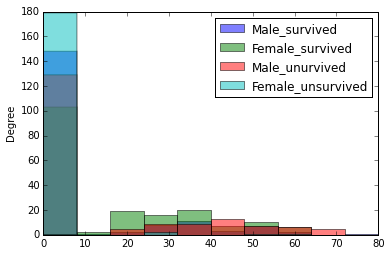

In [69]:
#10.Create a histogram of ages split by sex and survival.
df = data[['Age','Sex','Survived']]
df=df.dropna()
df.loc[df['Sex']=='male',['Sex']]=1
df.loc[df['Sex']=='female',['Sex']]=0 
df2 = DataFrame()
df2['Male_survived']=df['Sex']*df['Survived']*df['Age']
df2['Female_survived']=(df['Sex']-1)*(df['Survived'])*df['Age']*(-1)
df2['Male_unurvived']=(df['Sex'])*(df['Survived']-1)*df['Age']*(-1)
df2['Female_unsurvived']=(df['Sex']-1)*(df['Survived']-1)*df['Age']
df2[df2<0]=0
plt.figure()
df2.plot(kind='hist', alpha=0.5)


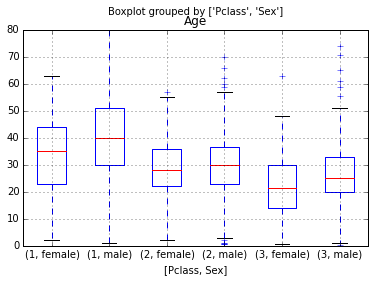

In [165]:

#11.Create a boxplot for age split by class and sex.
data.boxplot(column='Age',by=['Pclass','Sex'])

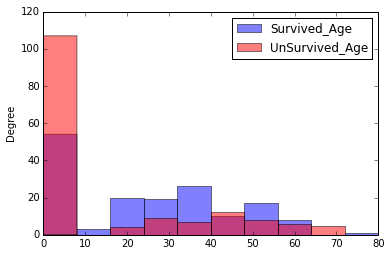

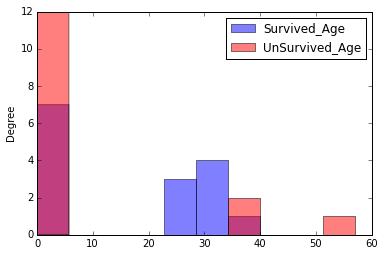

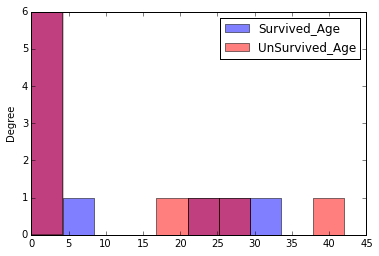

In [70]:
#12.For each class create a histogram plot of ages split by suvivor or not.
#( You will have one figure for each class. Each figure will have two histograms on it.
#One for survivors and one for non-survivors where the survivors are colored blue and non-survivors colored red) 
import matplotlib.pyplot as plt
data = data.dropna()
data['Survived_Age']=data['Survived']*data['Age']
data['UnSurvived_Age']=((data['Survived']-1)*data['Age'])*(-1)
data_class1 = data[data['Pclass']==1]
data_class1 = data_class1[['Survived_Age','UnSurvived_Age']]
data_class2 = data[data['Pclass']==2]
data_class2 = data_class2[['Survived_Age','UnSurvived_Age']]
data_class3 = data[data['Pclass']==3]
data_class3 = data_class3[['Survived_Age','UnSurvived_Age']]
plt.figure()

data_class1.plot(kind='hist',color=['Blue','Red'],alpha=0.5)
data_class2.plot(kind='hist',color=['Blue','Red'],alpha=0.5)
data_class3.plot(kind='hist',color=['Blue','Red'],alpha=0.5)

In [73]:
#13.Discuss anything interesting you found. Where there any surprises? 
#Are there any data issues you found? If you wanted to predict survival
#or not what do you think we be the most useful?

#answer:
#1. I found PClass 1 survied most, expensive cabin has more escaping equipement maybe?
    #Female and children survived more than male and adult.
#2. Data issue, some age values are null
#3. To predict the survival, the most useful features are Pclass,Sex, Age 